In [3]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from bs4 import BeautifulSoup
import requests

In [4]:
df = pd.read_csv('OnlineArrestData1980-2018.csv')

In [5]:
groups = df.drop(columns = ['VIOLENT', 'RACE', 'F_DRUGOFF', 'F_SEXOFF', 'F_ALLOTHER', 'F_TOTAL', 'M_TOTAL', 'S_TOTAL'])

In [6]:
groups = groups[groups.YEAR == 2018]

In [ ]:
groups = df.drop(columns = ['VIOLENT', 'RACE', 'F_DRUGOFF', 'F_SEXOFF', 'F_ALLOTHER', 'F_TOTAL', 'M_TOTAL', 'S_TOTAL'])
groups = groups[groups.YEAR == 2018]
groups = groups = groups.groupby(['COUNTY','GENDER','YEAR']).sum().reset_index()
groups = groups.sort_values('PROPERTY', ascending = False)
groups.head()

In [198]:
groups2 = df.drop(columns = ['VIOLENT', 'RACE', 'F_DRUGOFF', 'F_SEXOFF', 'F_ALLOTHER', 'F_TOTAL', 'M_TOTAL', 'S_TOTAL'])
groups2 = groups2[groups2.YEAR == 2018]
groups2 = groups2.groupby(['COUNTY', 'YEAR']).sum().reset_index()
groups2 = groups2.sort_values('PROPERTY', ascending = False)
groups2

,COUNTY,YEAR,PROPERTY
18,Los Angeles County,2018,18901
35,San Bernardino County,2018,7310
29,Orange County,2018,4877
36,San Diego County,2018,4140
32,Riverside County,2018,3565
33,Sacramento County,2018,3142
0,Alameda County,2018,3051
42,Santa Clara County,2018,2938
6,Contra Costa County,2018,2740
14,Kern County,2018,2607


In [138]:
male_avg = np.array(male_avg)

In [21]:
page = requests.get('https://www.california-demographics.com/counties_by_population')
soup = BeautifulSoup(page.content, 'html.parser')
container =  pd.read_html(page.content)

In [22]:
container = pd.DataFrame(container[0])

In [23]:
container.drop(columns = ['Rank'], inplace = True)

In [259]:
combined_table = container.join(groups2.set_index('COUNTY'), on = 'County')

In [260]:
combined_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 4 columns):
County        59 non-null object
Population    59 non-null object
YEAR          58 non-null float64
PROPERTY      58 non-null float64
dtypes: float64(2), object(2)
memory usage: 2.0+ KB


In [261]:
combined_table = combined_table.drop(58, axis=0)
combined_table = combined_table.astype({'Population':int, 'PROPERTY':int})

In [266]:
percentage = combined_table['PROPERTY']/combined_table['Population']
type(df86)

pandas.core.frame.DataFrame

In [267]:
combined_table['percentage'] = percentage

In [298]:
combined_table = combined_table.groupby(['County']).sum().reset_index()
combined_table = combined_table.sort_values('percentage', ascending = False)
combined_table.tail()

,County,Population,YEAR,PROPERTY,percentage
40,San Mateo County,769545,2018.0,874,0.001136
2,Amador County,39383,2018.0,40,0.001016
4,Calaveras County,45602,2018.0,42,0.000921
34,San Benito County,61537,2018.0,51,0.000829
25,Mono County,14250,2018.0,9,0.000632


In [297]:
sc = combined_table[combined_table['County'] == 'Sierra County']
sbc = combined_table[combined_table['County'] == 'San Bernardino County']
tc = combined_table[combined_table['County'] == 'Tulare County']
kc = combined_table[combined_table['County'] == 'Kern County']
sutter = combined_table[combined_table['County'] == 'Sutter County']
top_5 = pd.concat([sc, sbc, tc, kc, sutter])
top_5

,County,Population,YEAR,PROPERTY,percentage
45,Sierra County,2987,2018.0,15,0.005022
35,San Bernardino County,2171603,2018.0,7310,0.003366
53,Tulare County,465861,2018.0,1495,0.003209
14,Kern County,896764,2018.0,2607,0.002907
50,Sutter County,96807,2018.0,254,0.002624


In [311]:
smc = combined_table[combined_table['County'] == 'San Mateo County']
ac = combined_table[combined_table['County'] == 'Amador County']
cc = combined_table[combined_table['County'] == 'Calaveras County']
sbc = combined_table[combined_table['County'] == 'San Benito County']
mc = combined_table[combined_table['County'] == 'Mono County']
bot_5 = pd.concat([smc, ac, cc, sbc, mc])
bot_5

,County,Population,YEAR,PROPERTY,percentage
40,San Mateo County,769545,2018.0,874,0.001136
2,Amador County,39383,2018.0,40,0.001016
4,Calaveras County,45602,2018.0,42,0.000921
34,San Benito County,61537,2018.0,51,0.000829
25,Mono County,14250,2018.0,9,0.000632


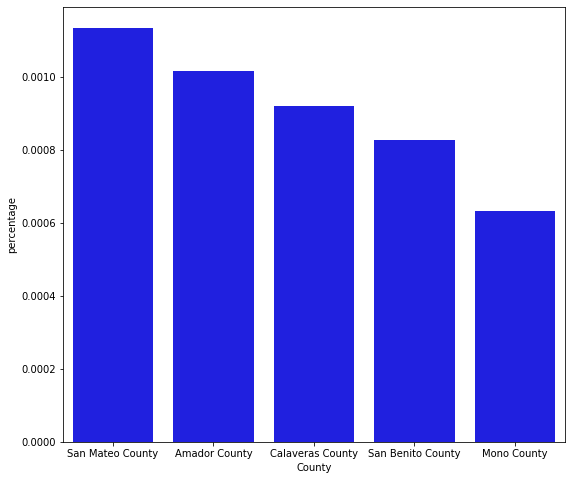

In [322]:
plt.figure(figsize = (9,8))
sns.barplot(y = 'percentage', x ='County', data = bot_5, color = 'blue')
plt.show()

In [41]:
male_crimes = df[df['GENDER']!= 'Female']
male_crimes = male_crimes[male_crimes['YEAR']==2018]
male_crimes = male_crimes.drop(columns = ['VIOLENT', 'RACE', 'F_DRUGOFF', 'F_SEXOFF', 'F_ALLOTHER', 'F_TOTAL', 'M_TOTAL', 'S_TOTAL'])
male_crimes=male_crimes.groupby(['GENDER', 'COUNTY', 'YEAR']).sum().reset_index()
male_avg = male_crimes['PROPERTY'].mean()
male_std = male_crimes['PROPERTY'].std()
male_crimes = male_crimes.sort_values('PROPERTY', ascending = False)
male_crimes= container.join(male_crimes.set_index('COUNTY'), on = 'County')
male_crimes = male_crimes.drop(58, axis = 0)
male_crimes = male_crimes.astype({'PROPERTY':int, 'Population':int})
male_percent = male_crimes['PROPERTY']/male_crimes['Population']
male_crimes['male percent'] = male_percent
male_crimes

,County,Population,GENDER,YEAR,PROPERTY,male percent
0,Los Angeles County,10105518,Male,2018.0,14261,0.001411
1,San Diego County,3343364,Male,2018.0,3163,0.000946
2,Orange County,3185968,Male,2018.0,3635,0.001141
3,Riverside County,2450758,Male,2018.0,2756,0.001125
4,San Bernardino County,2171603,Male,2018.0,5334,0.002456
5,Santa Clara County,1937570,Male,2018.0,2163,0.001116
6,Alameda County,1666753,Male,2018.0,2280,0.001368
7,Sacramento County,1540975,Male,2018.0,2344,0.001521
8,Contra Costa County,1150215,Male,2018.0,1922,0.001671
9,Fresno County,994400,Male,2018.0,1491,0.001499


In [42]:
male_crimes = df[df['GENDER']!= 'Male']
male_crimes = male_crimes[male_crimes['YEAR']==2018]
male_crimes = male_crimes.drop(columns = ['VIOLENT', 'RACE', 'F_DRUGOFF', 'F_SEXOFF', 'F_ALLOTHER', 'F_TOTAL', 'M_TOTAL', 'S_TOTAL'])
male_crimes=male_crimes.groupby(['GENDER', 'COUNTY', 'YEAR']).sum().reset_index()
male_avg = male_crimes['PROPERTY'].mean()
male_std = male_crimes['PROPERTY'].std()
male_crimes = male_crimes.sort_values('PROPERTY', ascending = False)
top_5_male_counties = male_crimes.head()
top_5_male_counties = pd.DataFrame(top_5_male_counties)
bot_5_male_counties = male_crimes.tail()
bot_5_male_counties = pd.DataFrame(bot_5_male_counties)
top_5_male_counties

,GENDER,COUNTY,YEAR,PROPERTY
18,Female,Los Angeles County,2018,4640
35,Female,San Bernardino County,2018,1976
29,Female,Orange County,2018,1242
36,Female,San Diego County,2018,977
6,Female,Contra Costa County,2018,818


In [178]:
page = requests.get('https://www.california-demographics.com/counties_by_population')
soup = BeautifulSoup(page.content, 'html.parser')
container =  pd.read_html(page.content)
container = pd.DataFrame(container[0])
container.drop(columns = ['Rank'], inplace = True)

In [179]:
container.drop(58, axis=0, inplace=True)

AttributeError: 'Rectangle' object has no property 'denisty'

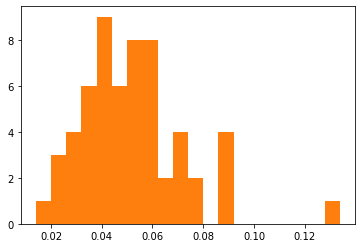

In [139]:
ax1 = plt.hist(top_5_female_counties['Female Percent'], bins = 20)
ax2 = plt.hist(top_5_male_counties['Male Percent'], bins = 20)


In [122]:
# container = container.astype({'Population':str})
# container = np.array(container)
container = container.astype({'Population':int})

In [101]:
container.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 57
Data columns (total 2 columns):
County        58 non-null object
Population    58 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [110]:
top_male_counties= container.join(male_crimes.set_index('COUNTY'), on = 'County')
# top_male_counties = top_male_counties.drop(58, axis = 0)

top_male_counties = top_male_counties.astype({'PROPERTY':int, 'Population':int})
male_percent = (top_male_counties['PROPERTY']/top_male_counties['Population'])*100
top_male_counties['Male Percent'] = male_percent

top_5_male_counties = top_male_counties.sort_values('Male Percent', ascending = False)
male_avg = top_5_male_counties['Male Percent'].mean()

top_5_male_counties.head()

,County,Population,GENDER,YEAR,PROPERTY,Male Percent
56,Sierra County,2987,Female,2018,4,0.133914
4,San Bernardino County,2171603,Female,2018,1976,0.090993
57,Alpine County,1101,Female,2018,1,0.090827
39,Lake County,64382,Female,2018,56,0.086981
17,Tulare County,465861,Female,2018,403,0.086506


In [140]:
import scipy.stats as stats

In [181]:
top_5_male_counties.head()

,County,Population,GENDER,YEAR,PROPERTY,Male Percent
56,Sierra County,2987,Female,2018,4,0.133914
4,San Bernardino County,2171603,Female,2018,1976,0.090993
57,Alpine County,1101,Female,2018,1,0.090827
39,Lake County,64382,Female,2018,56,0.086981
17,Tulare County,465861,Female,2018,403,0.086506


Text(0.5, 0, 'whole percent')

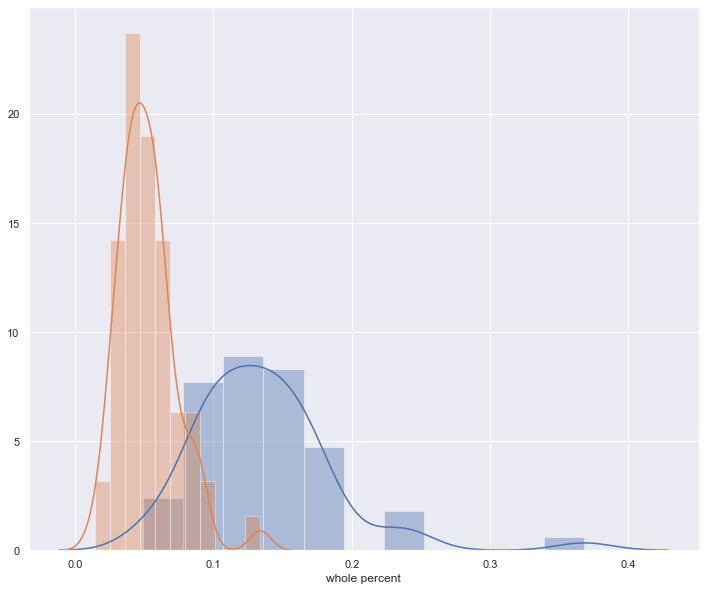

In [191]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(males)
sns.distplot(females)
plt.xlabel('whole percent')

In [185]:
male_crimes = df[df['GENDER']!= 'Female']
male_crimes = male_crimes[male_crimes['YEAR']==2018]
male_crimes = male_crimes.drop(columns = ['VIOLENT', 'RACE', 'F_DRUGOFF', 'F_SEXOFF', 'F_ALLOTHER', 'F_TOTAL', 'M_TOTAL', 'S_TOTAL'])
male_crimes=male_crimes.groupby(['GENDER', 'COUNTY', 'YEAR']).sum().reset_index()
male_avg = male_crimes['PROPERTY'].mean()
male_std = male_crimes['PROPERTY'].std()
print(male_avg)
print(male_std)

938.1724137931035
2074.332343552101


In [186]:
top_male_counties= container.join(male_crimes.set_index('COUNTY'), on = 'County')
# top_male_counties = top_male_counties.drop(58, axis = 0)

top_male_counties = top_male_counties.astype({'PROPERTY':int, 'Population':int})
male_percent = (top_male_counties['PROPERTY']/top_male_counties['Population'])*100
top_male_counties['Male Percent'] = male_percent

top_5_male_counties = top_male_counties.sort_values('Male Percent', ascending = False)
male_avg = top_5_male_counties['Male Percent'].mean()

top_5_male_counties.head()

,County,Population,GENDER,YEAR,PROPERTY,Male Percent
56,Sierra County,2987,Male,2018,11,0.368262
4,San Bernardino County,2171603,Male,2018,5334,0.245625
17,Tulare County,465861,Male,2018,1092,0.234405
10,Kern County,896764,Male,2018,2064,0.230161
54,Trinity County,12535,Male,2018,24,0.191464


In [187]:
top_5_female_counties

,County,Population,GENDER,YEAR,PROPERTY,Female Percent
56,Sierra County,2987,Female,2018,4,0.133914
4,San Bernardino County,2171603,Female,2018,1976,0.090993
57,Alpine County,1101,Female,2018,1,0.090827
39,Lake County,64382,Female,2018,56,0.086981
17,Tulare County,465861,Female,2018,403,0.086506
36,Sutter County,96807,Female,2018,77,0.079540
38,Yuba County,78041,Female,2018,62,0.079445
8,Contra Costa County,1150215,Female,2018,818,0.071117
40,Tehama County,63916,Female,2018,45,0.070405
49,Colusa County,21627,Female,2018,15,0.069358


In [188]:
males = top_5_male_counties['Male Percent']
females = top_5_female_counties['Female Percent']

In [189]:
twosample_tstatistic(males, females)

11.491664385097177

In [192]:
stats.ttest_ind(males,females)

Ttest_indResult(statistic=11.49166438509717, pvalue=9.097052562785951e-21)

In [ ]:
########ratios for restaurants##########

In [199]:
combined_table.head(1)

,County,Population,YEAR,PROPERTY,percentage
45,Sierra County,2987,2018,15,0.502176


In [204]:
combined_table.rename(columns = {'YEAR':'Year', 'PROPERTY':'Property'}, inplace = True)

In [297]:
combined_table.head()

45            Sierra 
35    San Bernardino 
53            Tulare 
14              Kern 
50            Sutter 
Name: County, dtype: object

In [208]:
df4 = pd.read_csv('restaurant-ratios.csv')

In [210]:
df4.drop(columns = ['Unnamed: 0'])

,County,ratio
0,Alameda,36233.760870
1,Amador,39383.000000
2,Colusa,21627.000000
3,Del Norte,13914.000000
4,Glenn,14023.500000
5,Humboldt,34093.250000
6,Inyo,17987.000000
7,Los Angeles,30438.307229
8,Modoc,8777.000000
9,Napa,27883.400000


In [224]:
df5 = pd.read_csv('lower-half-restaurants-ratio.csv')

In [225]:
df5.drop(columns = ['Unnamed: 0'])

,County,ratio
0,Butte,57814.000000
1,Contra Costa,42600.555556
2,Fresno,39776.000000
3,Imperial,90913.500000
4,Kern,49820.222222
5,Kings,50455.333333
6,Marin,259666.000000
7,Mendocino,87606.000000
8,Merced,54953.000000
9,Monterey,72599.000000


In [227]:
df6 = pd.concat([df4,df5])

In [357]:
# df6.drop(columns = ['Unnamed: 0'], inplace = True)
# combined_table = combined_table['County'].map(lambda x: x.replace('County', ''))
combined_table = container.join(county_crime.set_index('COUNTY'), on = 'County')
# combined_table = combined_table.drop(58, axis=0)
combined_table = combined_table.astype({'Population':int, 'PROPERTY':int})
percentage = (combined_table['PROPERTY']/combined_table['Population'])*100
combined_table['percentage'] = percentage
combined_table = combined_table.groupby(['County']).sum().reset_index()
combined_table = combined_table.sort_values('percentage', ascending = False)
combined_table.rename(columns = {'YEAR':'Year', 'PROPERTY':'Property'}, inplace = True)
combined_table1 = combined_table['County'].map(lambda x: x.replace('County', ''))
combined_table['County']=combined_table1
combined_table

,County,Population,Year,Property,percentage
45,Sierra,2987,2018,15,0.502176
35,San Bernardino,2171603,2018,7310,0.336618
53,Tulare,465861,2018,1495,0.320911
14,Kern,896764,2018,2607,0.290712
50,Sutter,96807,2018,254,0.262378
52,Trinity,12535,2018,31,0.247308
16,Lake,64382,2018,159,0.246963
57,Yuba,78041,2018,188,0.240899
22,Mendocino,87606,2018,211,0.240851
6,Contra Costa,1150215,2018,2740,0.238216


In [359]:
df6 = df6.sort_values(by = 'County', ascending = True)
df6

,County,ratio
0,Alameda,36233.760870
1,Amador,39383.000000
0,Butte,57814.000000
2,Colusa,21627.000000
1,Contra Costa,42600.555556
3,Del Norte,13914.000000
2,Fresno,39776.000000
4,Glenn,14023.500000
5,Humboldt,34093.250000
3,Imperial,90913.500000


In [ ]:
df.join(other.set_index('key'), on='key')

In [362]:
df8 = combined_table.merge(df6, on = 'County')
df8

,County,Population,Year,Property,percentage,ratio


In [343]:
df9 = combined_table.sort_values('County')

In [351]:
df10 = df6.merge(df9, how = 'inner')
df10

,County,ratio,Population,Year,Property,percentage


In [370]:
combined_table.head()

,County,Population,Year,Property,percentage
45,Sierra,2987,2018,15,0.502176
35,San Bernardino,2171603,2018,7310,0.336618
53,Tulare,465861,2018,1495,0.320911
14,Kern,896764,2018,2607,0.290712
50,Sutter,96807,2018,254,0.262378


In [410]:
df6.County.values[0]

'Alameda'

In [416]:
combined_table.County = combined_table.County.apply(lambda x: x.strip())

In [424]:
table2 = pd.merge(combined_table, df6, how = 'left', left_on='County', right_on='County')

In [402]:
combined_table.set_index('County').join(df6.set_index('County'))

,Population,Year,Property,percentage,ratio
County,,,,,
Sierra,2987,2018,15,0.502176,NaN
San Bernardino,2171603,2018,7310,0.336618,NaN
Tulare,465861,2018,1495,0.320911,NaN
Kern,896764,2018,2607,0.290712,NaN
Sutter,96807,2018,254,0.262378,NaN
Trinity,12535,2018,31,0.247308,NaN
Lake,64382,2018,159,0.246963,NaN
Yuba,78041,2018,188,0.240899,NaN
Mendocino,87606,2018,211,0.240851,NaN


In [426]:
table2= table2.dropna(axis = 0)

In [440]:
table2 = table2.sort_values(by = 'ratio', ascending = True)

In [434]:
len(table2)

45

In [441]:
top_half = table2[:22]

In [442]:
top_half

,County,Population,Year,Property,percentage,ratio
28,Modoc,8777,2018,16,0.182295,8777.000000
11,Del Norte,27828,2018,65,0.233578,13914.000000
34,Glenn,28047,2018,47,0.167576,14023.500000
39,Inyo,17987,2018,28,0.155668,17987.000000
35,Colusa,21627,2018,36,0.166459,21627.000000
53,San Mateo,769545,2018,874,0.113574,24048.281250
45,Napa,139417,2018,202,0.144889,27883.400000
41,Orange,3185968,2018,4877,0.153077,27947.087719
42,Santa Clara,1937570,2018,2938,0.151633,28080.724638
43,Placer,393149,2018,587,0.149307,28082.071429


In [443]:
bot_half = table2[23:]

In [444]:
bot_half

,County,Population,Year,Property,percentage,ratio
13,Solano,446610,2018,1024,0.229283,40600.909091
17,Sacramento,1540975,2018,3142,0.203897,41647.972973
9,Contra Costa,1150215,2018,2740,0.238216,42600.555556
12,Siskiyou,43724,2018,101,0.230994,43724.000000
44,Riverside,2450758,2018,3565,0.145465,45384.407407
3,Kern,896764,2018,2607,0.290712,49820.222222
18,Kings,151366,2018,307,0.202820,50455.333333
15,Tuolumne,54539,2018,122,0.223693,54539.000000
24,Merced,274765,2018,510,0.185613,54953.000000
37,Yolo,220408,2018,351,0.159250,55102.000000


In [445]:
top_half_mean = top_half['ratio'].mean()

In [446]:
top_half_mean

28701.179591251712

In [447]:
bot_half_mean = bot_half['ratio'].mean()

In [448]:
bot_half_mean

73160.49493989267

In [452]:
table2.rename(columns = {'ratio':'Ratio'})

,County,Population,Year,Property,percentage,Ratio
28,Modoc,8777,2018,16,0.182295,8777.000000
11,Del Norte,27828,2018,65,0.233578,13914.000000
34,Glenn,28047,2018,47,0.167576,14023.500000
39,Inyo,17987,2018,28,0.155668,17987.000000
35,Colusa,21627,2018,36,0.166459,21627.000000
53,San Mateo,769545,2018,874,0.113574,24048.281250
45,Napa,139417,2018,202,0.144889,27883.400000
41,Orange,3185968,2018,4877,0.153077,27947.087719
42,Santa Clara,1937570,2018,2938,0.151633,28080.724638
43,Placer,393149,2018,587,0.149307,28082.071429


In [456]:
top_half_stdev = top_half['ratio'].std()
top_half_stdev
bot_half_stdev = bot_half['ratio'].std()
bot_half_stdev

47321.826300122164

In [459]:
t_score = stats.ttest_ind_from_stats(mean1 = top_half_mean, mean2 = bot_half_mean, std1 = top_half_stdev, 
                                    std2 = bot_half_stdev, nobs1 = len(top_half), nobs2 = len(bot_half),
                                    equal_var = False)
t_score

Ttest_indResult(statistic=-4.333598205256982, pvalue=0.00025732544882016537)

In [540]:
top_male_counties= container.join(male_crimes.set_index('COUNTY'), on = 'County')
# top_male_counties = top_male_counties.drop(58, axis = 0)

top_male_counties = top_male_counties.astype({'PROPERTY':int, 'Population':int})
male_percent = (top_male_counties['PROPERTY']/top_male_counties['Population'])
top_male_counties['Male Percent'] = male_percent

top_male_counties = top_male_counties.sort_values('Male Percent', ascending = False)
male_avg = top_male_counties['Male Percent'].mean()

top_5_male_counties = top_male_counties[:5]
top_male_counties

,County,Population,GENDER,YEAR,PROPERTY,Male Percent
56,Sierra County,2987,Male,2018,11,0.003683
4,San Bernardino County,2171603,Male,2018,5334,0.002456
17,Tulare County,465861,Male,2018,1092,0.002344
10,Kern County,896764,Male,2018,2064,0.002302
54,Trinity County,12535,Male,2018,24,0.001915
36,Sutter County,96807,Male,2018,177,0.001828
37,Mendocino County,87606,Male,2018,157,0.001792
30,Shasta County,180040,Male,2018,321,0.001783
48,Del Norte County,27828,Male,2018,49,0.001761
15,Stanislaus County,549815,Male,2018,933,0.001697


In [591]:
top_female_counties= container.join(female_crimes.set_index('COUNTY'), on = 'County')
# top_female_counties = top_female_counties.drop(58, axis = 0)

top_female_counties = top_female_counties.astype({'PROPERTY':int, 'Population':int})
female_percent = (top_female_counties['PROPERTY']/top_female_counties['Population'])
top_female_counties['Female Percent'] = female_percent

top_female_counties = top_female_counties.sort_values('Female Percent', ascending = False)
female_avg = top_female_counties['Female Percent'].mean()

top_5_female_counties = top_female_counties[:5]
top_female_counties.head()

,County,Population,GENDER,YEAR,PROPERTY,Female Percent
56,Sierra County,2987,Female,2018,4,0.001339
4,San Bernardino County,2171603,Female,2018,1976,0.000910
57,Alpine County,1101,Female,2018,1,0.000908
39,Lake County,64382,Female,2018,56,0.000870
17,Tulare County,465861,Female,2018,403,0.000865


In [592]:
new_males = top_male_counties.drop(columns = ['Population','YEAR'])

In [593]:
new_males.rename(columns = {'GENDER':'Gender'}, inplace = True)

In [594]:
male_female_table = pd.concat([new_males,top_female_counties], axis = 1, )

In [596]:
male_female_table.drop([5]);

In [597]:
male_female_table.rename(columns = {'GENDER':'Gender'}, inplace = True)
male_female_table;

In [635]:
murat_df = male_female_table.loc[:,~male_female_table.columns.duplicated()]

In [599]:
murat_df.head()

,County,Gender,PROPERTY,Male Percent,Population,YEAR,Female Percent
0,Los Angeles County,Male,14261,0.001411,10105518,2018,0.000459
1,San Diego County,Male,3163,0.000946,3343364,2018,0.000292
2,Orange County,Male,3635,0.001141,3185968,2018,0.000390
3,Riverside County,Male,2756,0.001125,2450758,2018,0.000330
4,San Bernardino County,Male,5334,0.002456,2171603,2018,0.000910


In [600]:
murat_df = murat_df.melt(id_vars=['County'], value_vars=['Female Percent', 'Male Percent'])

murat_df.head()

,County,variable,value
0,Los Angeles County,Female Percent,0.000459
1,San Diego County,Female Percent,0.000292
2,Orange County,Female Percent,0.000390
3,Riverside County,Female Percent,0.000330
4,San Bernardino County,Female Percent,0.000910


In [601]:
male_female_table[male_female_table['Female Percent'] > 0.10]

,County,Gender,PROPERTY,Male Percent,County,Population,Gender,YEAR,PROPERTY,Female Percent


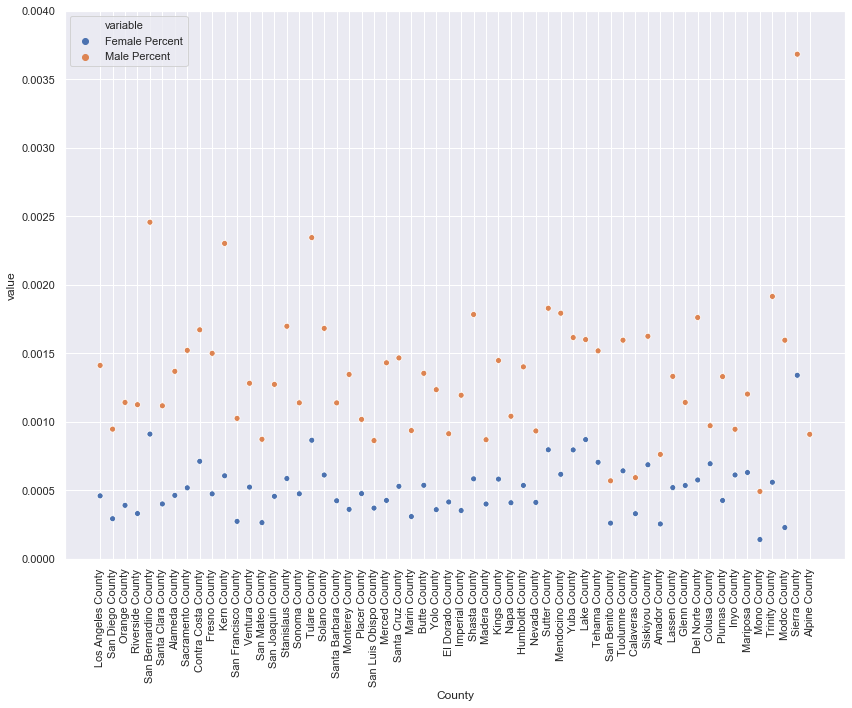

In [619]:
ax =sns.scatterplot(data = murat_df, x = 'County', y = 'value', hue = 'variable')

plt.ylim((0,0.0040))

ax.set_xticklabels(rotation=90, labels = murat_df.County.tolist())
plt.tight_layout()

In [564]:
sns.scatterplot(x = 'Male Percent', y = 'County', data = male_female_table)

ValueError: could not broadcast input array from shape (58) into shape (2)

In [622]:
combined_table

,County,Population,Year,Property,percentage
45,Sierra,2987,2018,15,0.502176
35,San Bernardino,2171603,2018,7310,0.336618
53,Tulare,465861,2018,1495,0.320911
14,Kern,896764,2018,2607,0.290712
50,Sutter,96807,2018,254,0.262378
52,Trinity,12535,2018,31,0.247308
16,Lake,64382,2018,159,0.246963
57,Yuba,78041,2018,188,0.240899
22,Mendocino,87606,2018,211,0.240851
6,Contra Costa,1150215,2018,2740,0.238216


In [648]:
top_percent = combined_table[:29]

In [649]:
top_percent

,County,Population,Year,Property,percentage
45,Sierra,2987,2018,15,0.502176
35,San Bernardino,2171603,2018,7310,0.336618
53,Tulare,465861,2018,1495,0.320911
14,Kern,896764,2018,2607,0.290712
50,Sutter,96807,2018,254,0.262378
52,Trinity,12535,2018,31,0.247308
16,Lake,64382,2018,159,0.246963
57,Yuba,78041,2018,188,0.240899
22,Mendocino,87606,2018,211,0.240851
6,Contra Costa,1150215,2018,2740,0.238216


In [626]:
bot_percent = combined_table[29:]

In [629]:
bot_percent

,County,Population,Year,Property,percentage
1,Alpine,1101,2018,2,0.181653
55,Ventura,850967,2018,1535,0.180383
31,Plumas,18804,2018,33,0.175495
38,San Joaquin,752660,2018,1301,0.172854
26,Monterey,435594,2018,743,0.170572
10,Glenn,28047,2018,47,0.167576
5,Colusa,21627,2018,36,0.166459
48,Sonoma,499942,2018,806,0.161219
56,Yolo,220408,2018,351,0.159250
41,Santa Barbara,446527,2018,697,0.156094


In [642]:
top_percent['percentage'].mean()

In [634]:
bot_percent['percentage'].mean()

0.14119115742068614

In [637]:
final_table = pd.merge(combined_table, df6, how = 'left', left_on='County', right_on='County')
final_table = final_table.dropna(axis=0)
final_table = final_table.sort_values(by = 'ratio', ascending = True)

In [638]:
final_table

,County,Population,Year,Property,percentage,ratio
28,Modoc,8777,2018,16,0.182295,8777.000000
11,Del Norte,27828,2018,65,0.233578,13914.000000
34,Glenn,28047,2018,47,0.167576,14023.500000
39,Inyo,17987,2018,28,0.155668,17987.000000
35,Colusa,21627,2018,36,0.166459,21627.000000
53,San Mateo,769545,2018,874,0.113574,24048.281250
45,Napa,139417,2018,202,0.144889,27883.400000
41,Orange,3185968,2018,4877,0.153077,27947.087719
42,Santa Clara,1937570,2018,2938,0.151633,28080.724638
43,Placer,393149,2018,587,0.149307,28082.071429


In [639]:
top_half = final_table[:22]
bot_half = final_table[23:]

In [640]:
top_half

,County,Population,Year,Property,percentage,ratio
28,Modoc,8777,2018,16,0.182295,8777.000000
11,Del Norte,27828,2018,65,0.233578,13914.000000
34,Glenn,28047,2018,47,0.167576,14023.500000
39,Inyo,17987,2018,28,0.155668,17987.000000
35,Colusa,21627,2018,36,0.166459,21627.000000
53,San Mateo,769545,2018,874,0.113574,24048.281250
45,Napa,139417,2018,202,0.144889,27883.400000
41,Orange,3185968,2018,4877,0.153077,27947.087719
42,Santa Clara,1937570,2018,2938,0.151633,28080.724638
43,Placer,393149,2018,587,0.149307,28082.071429


In [665]:
mean1 = top_percent['percentage'].mean()
std1 = np.std(top_percent['percentage'])
len1 = len(top_percent)
mean2 = np.mean(top_half['ratio'])
nobs2 = len(top_half['ratio'])
std2 = np.std(top_half['ratio'])
top_ff_crime = stats.ttest_ind_from_stats(mean1 = mean1, std1= std1,nobs1=len1, 
                                          mean2 = mean2, nobs2 = nobs2, std2 = std2, 
                                          equal_var = False)
top_ff_crime

Ttest_indResult(statistic=-15.786858480033832, pvalue=3.997949795003411e-13)

In [666]:
mean1 = bot_percent['percentage'].mean()
std1 = np.std(bot_percent['percentage'])
nobs1 = len(bot_percent['percentage'])
mean2 = np.mean(bot_half['ratio'])
std2 = np.std(bot_half['ratio'])
nobs2 = len(bot_half['ratio'])
bot_ff_crime = stats.ttest_ind_from_stats(mean1 = mean1, std1=std1, nobs1 = nobs1,
                                          mean2 = mean2, std2 = std2, nobs2 = nobs, 
                                          equal_var = False)
bot_ff_crime

Ttest_indResult(statistic=-7.422109086401285, pvalue=2.68131149158499e-07)

In [680]:
from scipy.integrate import simps
from scipy.stats import t

import math
#confidence interval og group over 1million
mean = combined_table['percentage'].mean()
    # evaluate sample variance by setting delta degrees of freedom (ddof) to
    # 1. The degree used in calculations is N - ddof
stddev = combined_table['percentage'].std()
    # Get the endpoints of the range that contains 95% of the distribution
t_bounds = t.interval(0.95, 7)
    # sum mean to the confidence interval
ci = [mean + critical * stddev / sqrt(8) for critical in t_bounds]
print('Mean: %f' % mean)
print('Confidence Interval 95%%: %f, %f' % (ci[0], ci[1]))

Mean: 0.188248
Confidence Interval 95%: 0.130615, 0.245882
